In [45]:
# import system modules
import sys
import os
import gc

# import standard numerical modules
import numpy as np
import math

# import machine learning modules
import tensorflow as tf
import keras.backend as K


sys.path.append('../20240503')
import DCTR


In [32]:
from importlib import reload
reload(DCTR)


<module 'DCTR' from '/home/finn/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/../20240503/DCTR.py'>

In [2]:
# directory with pre converted lhe files as numpy arrays
data_dir = '../../Data' # modify as needed


In [11]:
# Load pre-normed Datasets: MiNNLO: X1 | POWHEG hvq: X0
# only contain tt-pair; every event has order: 
# tt-pair, top, anti-top
# every particle has arguments: 
# [pt, y, phi, mass, eta, E, PID, w, theta]
# [0 , 1, 2  , 3   , 4  , 5, 6  , 7, 8    ]

# POWHEG hvq
# plotting data; different from training data
X0_plt_showered = []
X0_plt_showered = np.load(f'{data_dir}/POWHEG_hvq/showered/converted_lhe_03.npy')[:9543943] # 9553938 num of MiNNLO samples
print('POWHEG hvq X0_plt_showered.shape: '+str(X0_plt_showered.shape))


POWHEG hvq X0_plt_showered.shape: (9543943, 3, 9)


In [12]:
# MiNNLO
# plotting data
X1_plt_showered = []
X1_plt_showered = np.load(f'{data_dir}/MiNNLO/showered/converted_lhe.npy')
print(f'{np.shape(X1_plt_showered) = }')


np.shape(X1_plt_showered) = (9543943, 3, 9)


In [ ]:
# before shower

In [23]:
# POWHEG hvq
# plotting data; different from training data
X0_plt = []
X0_plt = np.load(f'{data_dir}/POWHEG_hvq/13TeV/03-04_converted_lhe.npz')['a'][:9543943] # 9543943 num of showered MiNNLO samples
print('POWHEG hvq X0_plt.shape: '+str(X0_plt.shape))


POWHEG hvq X0_plt.shape: (9543943, 5, 9)


In [9]:
# MiNNLO
# plotting data
X1_plt = []
X1_plt = np.load(f'{data_dir}/MiNNLO/converted_with_13TeV_NLO/converted_lhe.npz')['a'][:9543943] # 9543943 num of showered MiNNLO samples
print(f'{np.shape(X1_plt) = }')


np.shape(X1_plt) = (9543943, 11, 9)


In [24]:
# get event generator weights
X0_plt_showered_wgt = X0_plt_showered[:, 0, 7].copy()
X1_plt_showered_wgt = X1_plt_showered[:, 0, 7].copy()

print(X0_plt_showered_wgt)
print(X1_plt_showered_wgt)

X0_plt_wgt = X0_plt[:, 0, 7].copy()
X1_plt_wgt = X1_plt[:, 0, 7].copy()

print(X0_plt_wgt)
print(X1_plt_wgt)


[ 692.452  692.452  692.452 ...  691.115 -691.115  691.115]
[-103.245  103.245 -103.245 ...  103.245  103.245  103.245]
[692.465 692.465 692.465 ... 691.651 691.651 691.651]
[-103.245  103.245 -103.245 ...  103.245 -103.245 -103.245]


In [25]:
# setup args for plotting
args = [(X1_plt, X1_plt_wgt, 'MiNNLO before shower'),
        (X1_plt_showered, X1_plt_showered_wgt, 'MiNNLO after shower'),
        (X0_plt, X0_plt_wgt, 'NLO (hvq) before shower'),
        (X0_plt_showered, X0_plt_showered_wgt, 'NLO (hvq) after shower')]


# Paper Plots

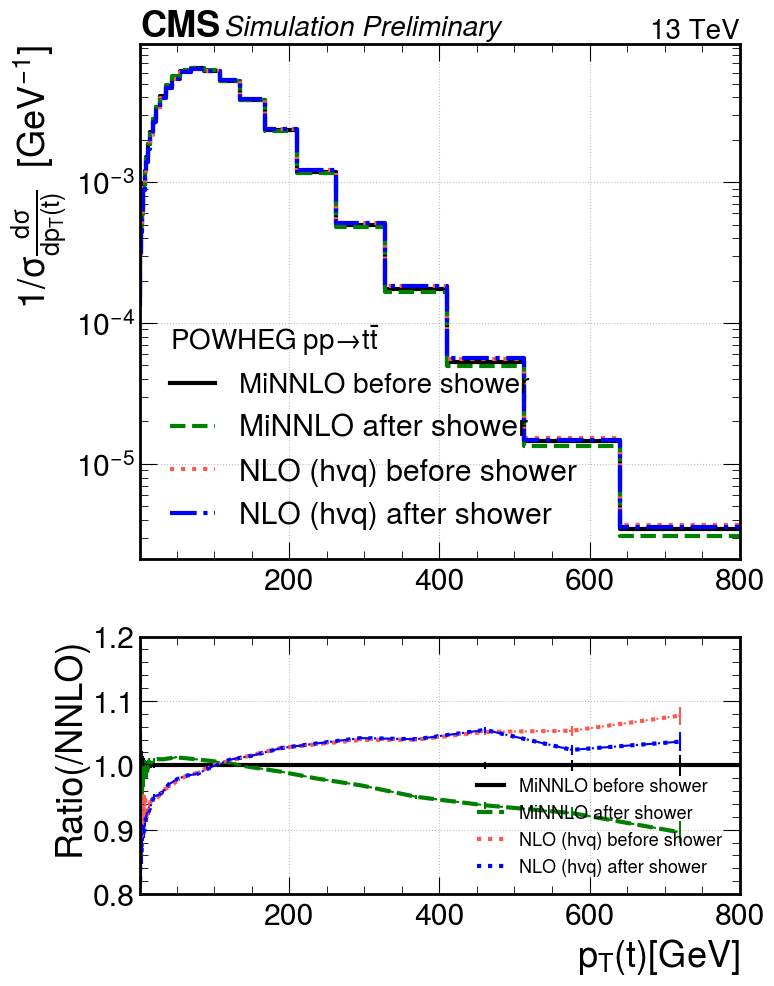

In [41]:
# p_t(t) log binning
log_bins = np.logspace(np.log10(1), np.log10(800), 31)
DCTR.plot_ratio_cms_4(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'before_after_shower')


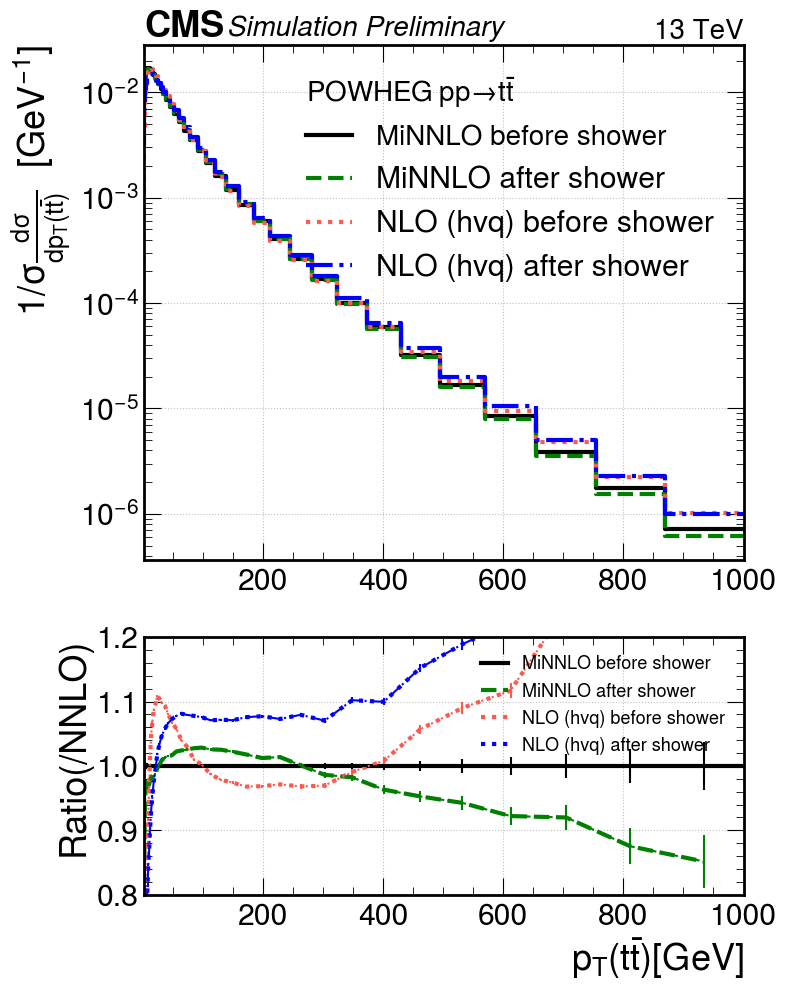

In [42]:
# p_t(tt) log binning
log_bins = np.logspace(np.log10(1), np.log10(1000), 50)
DCTR.plot_ratio_cms_4(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.80, 1.20], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$ ', save_prefix = 'before_after_shower')



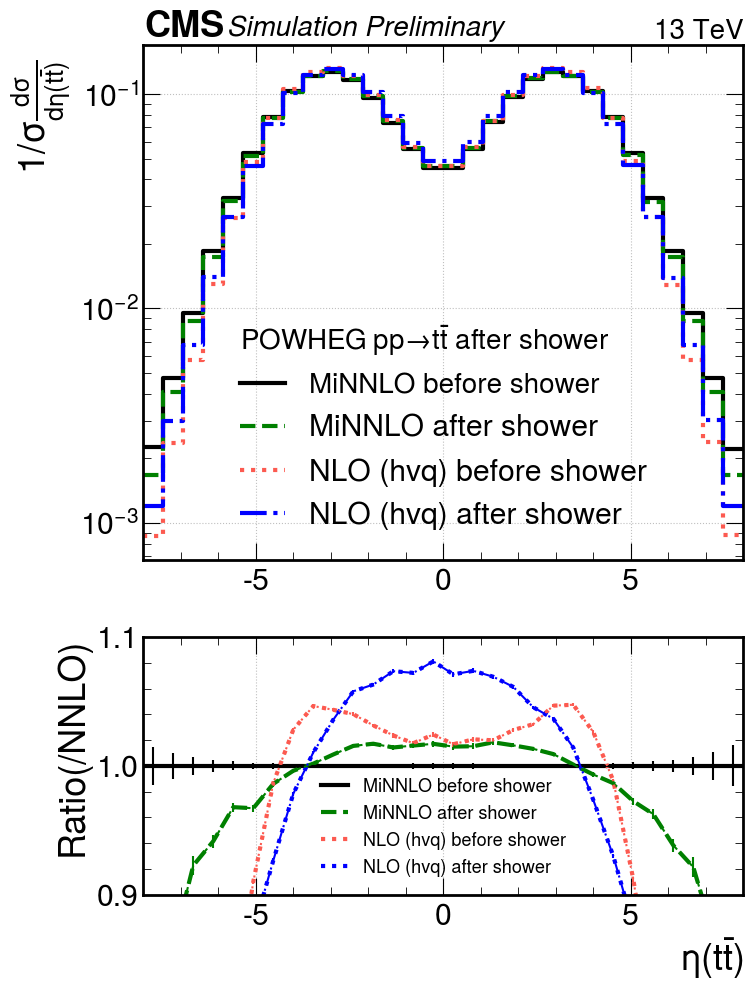

In [43]:
# eta(tt) +/- 8
lin_bins = np.linspace(-8, 8, 31)
DCTR.plot_ratio_cms_4(args, arg_index=4, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.90, 1.10], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$ after shower', save_prefix = 'before_after_shower')


In [ ]:
# compare ratio of histograms only


In [60]:
# p_t(tt) log binning
part = 0 # tt-bar
arg = 0 # pt

bins = np.logspace(np.log10(1), np.log10(1000), 50)

hist0, _ = np.histogram(X0_plt[:,part,arg], bins = bins, weights = X0_plt_wgt, density=True)
hist0_showered, _ = np.histogram(X0_plt[:,part,arg], bins = bins, weights = X0_plt_showered_wgt, density=True)
hist1, _ = np.histogram(X1_plt[:,part,arg], bins = bins, weights = X1_plt_wgt, density=True)
hist1_showered, _ = np.histogram(X1_plt[:,part,arg], bins = bins, weights = X1_plt_showered_wgt, density=True)


In [61]:
ratio = hist0/hist1

ratio_showered = hist0_showered/hist1_showered



In [62]:
print(ratio)


[0.15023571 0.20113226 0.24353881 0.27609337 0.31328711 0.34132034
 0.39715738 0.43005329 0.48816782 0.55418787 0.6131703  0.68348586
 0.73687739 0.80006425 0.86238248 0.91754058 0.96505809 1.01226157
 1.04683141 1.06744708 1.08742238 1.09570789 1.10912632 1.10439648
 1.09728827 1.09339661 1.08067248 1.06717133 1.05795333 1.0398059
 1.02963095 1.00980682 1.00204669 0.98695938 0.9784816  0.97415873
 0.96789539 0.96857635 0.9713355  0.96816518 0.9695154  0.99064772
 1.00800359 1.05687172 1.08999819 1.1169678  1.24620714 1.281703
 1.41967227]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


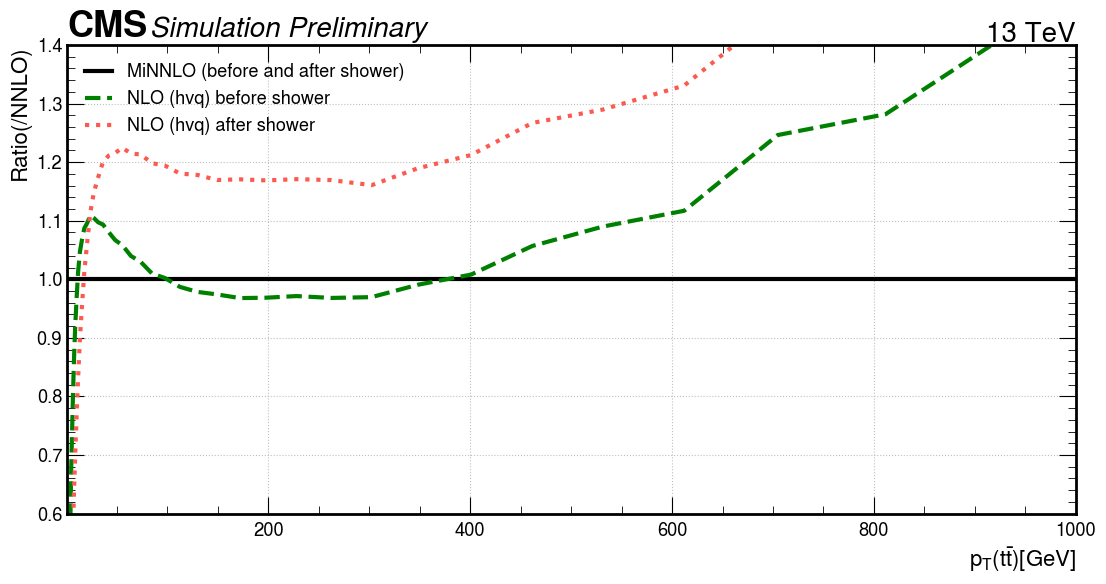

In [74]:
# plot the hists above
ratio_ylim = [0.6, 1.4]

import mplhep as hep
plt.style.use(hep.style.CMS)
plt_style_10a = {'color':'Green', 'linewidth':3, 'linestyle':'--'} #, 'density':True, 'histtype':'step'}
plt_style_11a = {'color':'black', 'linewidth':3, 'linestyle':'-'} #', 'density':True, 'histtype':'step'}
plt_style_12a = {'color':'#FC5A50', 'linewidth':3, 'linestyle':':'} #, 'density':True, 'histtype':'step'}

font = {'size'   : 16}
plt.rc('font', **font)

# labels and titles
pythia_text = r'$POWHEG \; pp \to  t\bar{t}$'
hep_text = 'Simulation Preliminary'
def make_legend(ax, title):
    leg = ax.legend(frameon=False)
    leg.set_title(title, prop={'size':20})
    leg._legend_box.align = "left"
    plt.tight_layout()


# Create figure with two subplots
fig, ax = plt.subplots(nrows=1, figsize=(11,5.5))
fig.tight_layout(pad=0.5)

# First subplot
bin_centers = (bins[:-1] + bins[1:]) / 2.0

make_legend(ax, pythia_text)
obs = r'p_{T}'
part = r't\bar{t}'
unit =r' [GeV]'
inv_unit = r' [GeV$^{-1}$]'

start = bins[0]
stop = bins[-1]


ax.plot([start, stop], [1,1], '-', color='black',  linewidth=3, label='MiNNLO (before and after shower)')

ax.plot(bin_centers, ratio,  '--', color='green',  linewidth=3, label='NLO (hvq) before shower')
ax.plot(bin_centers, ratio_showered, ':', color='#FC5A50',linewidth=3, label='NLO (hvq) after shower')


ax.set_xlabel(fr'${obs}({part}){unit}$')
ax.set_ylabel(f'Ratio(/NNLO)')
ax.grid(True)

# print(f'uncertainty NLO: {uncert_nrm_list[0]}')

#plt.subplots_adjust(hspace=2)
#plt.subplots_adjust(left=0.2, right=0.95, bottom=0.1, top=0.95)
ax.set_ylim(ratio_ylim)

ax.set_xlim([start,stop])
ax.set_xlim([start,stop])
ax.legend(fontsize=13)

hep.cms.text(hep_text, loc=0, fontsize=20, ax=ax)
ax.text(1.0, 1.05, '13 TeV', ha="right", va="top", fontsize=20, transform=ax.transAxes)

plt.savefig('./plots/tt-pair/before-after_shower_pt_tt_hvq-MiNNLO_ratio.pdf')
